# Convolutional Neural Network Architecture

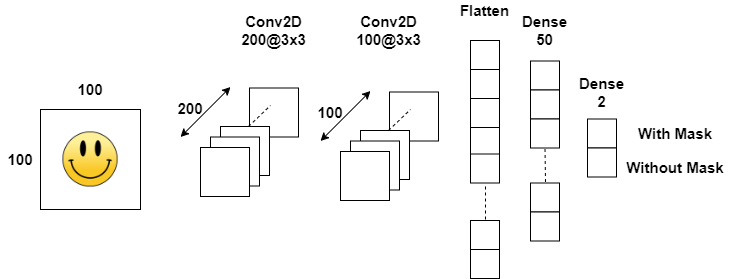

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Train on 1057 samples, validate on 265 samples
Epoch 1/10
1057/1057 [==============================] - 98s 92ms/step - loss: 0.6523 - accuracy: 0.6187 - val_loss: 2.9340 - val_accuracy: 0.5057
Epoch 2/10
1057/1057 [==============================] - 74s 70ms/step - loss: 0.6780 - accuracy: 0.7039 - val_loss: 0.3969 - val_accuracy: 0.8302
Epoch 3/10
1057/1057 [==============================] - 74s 70ms/step - loss: 0.3901 - accuracy: 0.8420 - val_loss: 0.3454 - val_accuracy: 0.8642
Epoch 4/10
1057/1057 [==============================] - 74s 70ms/step - loss: 0.2748 - accuracy: 0.8931 - val_loss: 0.2324 - val_accuracy: 0.9245
Epoch 5/10
1057/1057 [==============================] - 73s 69ms/step - loss: 0.2112 - accuracy: 0.9149 - val_loss: 0.1848 - val_accuracy: 0.9396
Epoch 6/10
1057/1057 [==============================] - 73s 69ms/step - loss: 0.1431 - accuracy: 0.9546 - val_loss: 0.1804 - val_accuracy: 0.9208
Epoch 7/10
1057/1057 [==============================] - 74s 70ms/step - loss:

ERROR! Session/line number was not unique in database. History logging moved to new session 97


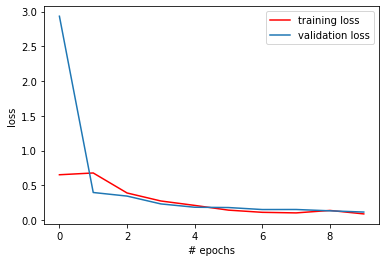

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

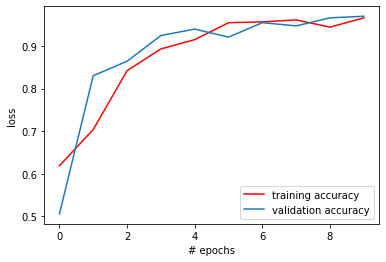

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

147/147 [==============================] - 3s 17ms/step
[0.14276415231276532, 0.9591836929321289]


In [12]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [13]:
data

array([[[[-0.        ,  0.        , -0.        ],
         [ 0.        ,  0.08661413,  0.0629921 ],
         [ 0.11023617,  0.12598431,  0.11023617],
         ...,
         [ 0.06622901, -0.00799361, -0.01931994],
         [-0.05472642, -0.06553845, -0.01296534],
         [-0.03327479, -0.04007315, -0.02927374]],

        [[-0.02198826,  0.02664346,  0.0183972 ],
         [-0.03357703, -0.00231915, -0.00595005],
         [ 0.04315193, -0.00392259, -0.02927569],
         ...,
         [-0.02755927,  0.04459799, -0.0428758 ],
         [ 0.03695839, -0.05042222,  0.030555  ],
         [-0.04217245,  0.03071344,  0.00030091]],

        [[ 0.02522885, -0.02403321, -0.01846177],
         [ 0.03287788, -0.04606944, -0.00606642],
         [ 0.00874023,  0.00002716,  0.04798789],
         ...,
         [ 0.0288522 ,  0.0573196 , -0.01041184],
         [-0.078389  , -0.01734314,  0.07063766],
         [ 0.00764235,  0.03266269,  0.00979007]],

        ...,

        [[ 6.        ,  0.        ,  3

In [14]:
# Replace this with the path to your image
image = Image.open(r'C:\Users\user\Desktop\COVID PROJECT\IMG_20210710_165324.jpg')

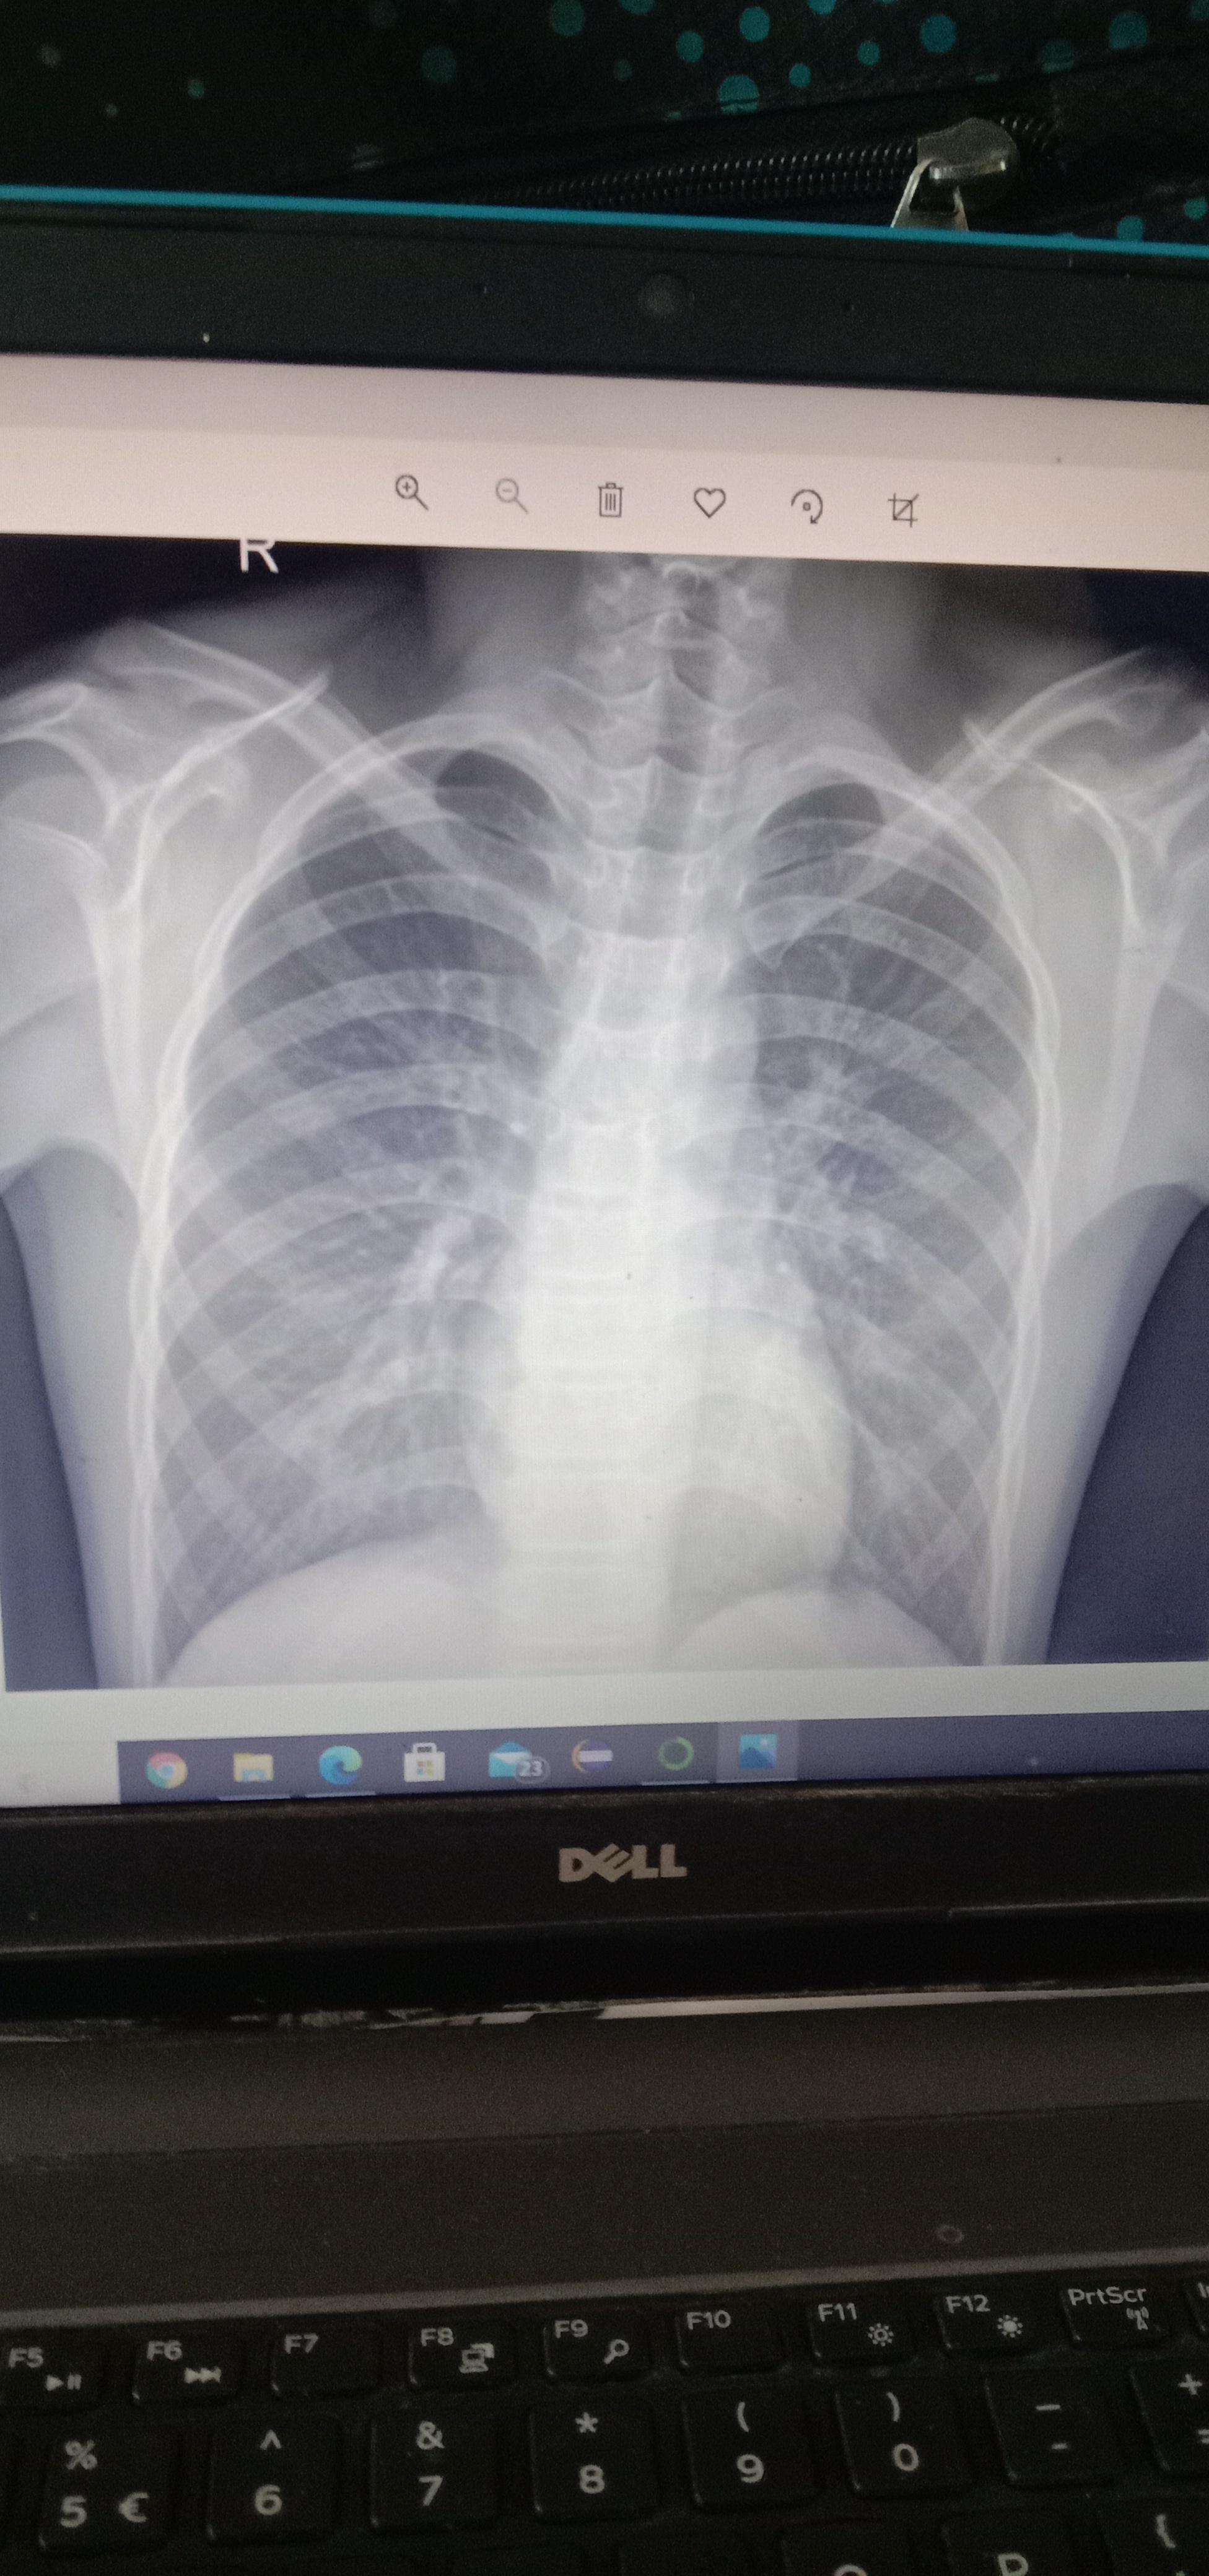

In [15]:
image

In [16]:
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

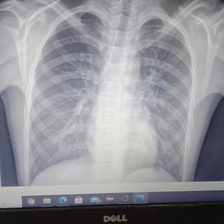

In [18]:
image

In [19]:
#turn the image into a numpy array
image_array = np.asarray(image)

In [20]:
image_array

array([[[ 62,  60,  72],
        [ 63,  61,  73],
        [ 63,  60,  74],
        ...,
        [ 47,  44,  53],
        [ 45,  42,  50],
        [ 43,  39,  47]],

       [[ 61,  60,  70],
        [ 68,  66,  78],
        [ 77,  74,  86],
        ...,
        [ 55,  53,  59],
        [ 52,  49,  55],
        [ 48,  47,  53]],

       [[ 79,  77,  89],
        [ 90,  89, 100],
        [112, 110, 119],
        ...,
        [ 63,  60,  67],
        [ 59,  56,  63],
        [ 60,  57,  64]],

       ...,

       [[ 20,  21,  20],
        [ 18,  20,  18],
        [ 20,  20,  19],
        ...,
        [ 15,  15,  13],
        [ 15,  15,  12],
        [ 14,  15,  11]],

       [[ 18,  18,  18],
        [ 18,  20,  19],
        [ 18,  20,  18],
        ...,
        [ 16,  16,  15],
        [ 17,  17,  14],
        [ 16,  16,  14]],

       [[ 17,  18,  16],
        [ 17,  19,  16],
        [ 17,  18,  16],
        ...,
        [ 16,  16,  14],
        [ 17,  17,  15],
        [ 19,  19,  17]]

In [21]:
# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

In [22]:
normalized_image_array

array([[[-0.511811  , -0.52755904, -0.43307084],
        [-0.503937  , -0.51968503, -0.42519683],
        [-0.503937  , -0.52755904, -0.4173228 ],
        ...,
        [-0.62992126, -0.6535433 , -0.5826771 ],
        [-0.6456693 , -0.6692914 , -0.6062992 ],
        [-0.66141737, -0.6929134 , -0.62992126]],

       [[-0.51968503, -0.52755904, -0.44881892],
        [-0.46456695, -0.48031497, -0.38582677],
        [-0.39370078, -0.4173228 , -0.32283467],
        ...,
        [-0.5669291 , -0.5826771 , -0.53543305],
        [-0.59055114, -0.61417323, -0.5669291 ],
        [-0.62204725, -0.62992126, -0.5826771 ]],

       [[-0.37795275, -0.39370078, -0.29921257],
        [-0.29133856, -0.29921257, -0.21259844],
        [-0.11811024, -0.13385826, -0.06299216],
        ...,
        [-0.503937  , -0.52755904, -0.47244096],
        [-0.53543305, -0.5590551 , -0.503937  ],
        [-0.52755904, -0.5511811 , -0.496063  ]],

       ...,

       [[-0.8425197 , -0.8346457 , -0.8425197 ],
        [-0

In [23]:
#data[0] = normalized_image_array

In [24]:
# run the inference
prediction = model.predict(data)
print(prediction)

[[0.209075   0.79092497]]


In [11]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model(r'C:\Users\user\Desktop\COVID PROJECT\keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open(r'C:\Users\user\Desktop\COVID PROJECT\IMG_20210710_165324.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

ERROR! Session/line number was not unique in database. History logging moved to new session 98


[[0.9929603  0.00703975]]
